<a href="https://colab.research.google.com/github/CPietraviva/Book1-DeepLearningConPyton/blob/Top/Book1_DeepLearningConPyton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Esercizio Capitolo 2 v1


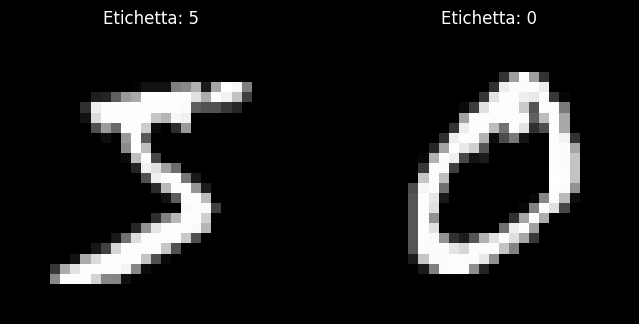

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8411 - loss: 1.0257 - val_accuracy: 0.9237 - val_loss: 0.4290
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9169 - loss: 0.4539 - val_accuracy: 0.9365 - val_loss: 0.3751
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9261 - loss: 0.4110 - val_accuracy: 0.9342 - val_loss: 0.3747
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9267 - loss: 0.3996 - val_accuracy: 0.9448 - val_loss: 0.3393
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9347 - loss: 0.3739 - val_accuracy: 0.9459 - val_loss: 0.3282
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9324 - loss: 0.3768 - val_accuracy: 0.9475 - val_loss: 0.3245
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9387 - loss: 0.3537 - val_accuracy: 0.9492 - val_loss: 0.3255
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9368 - loss: 0.3637

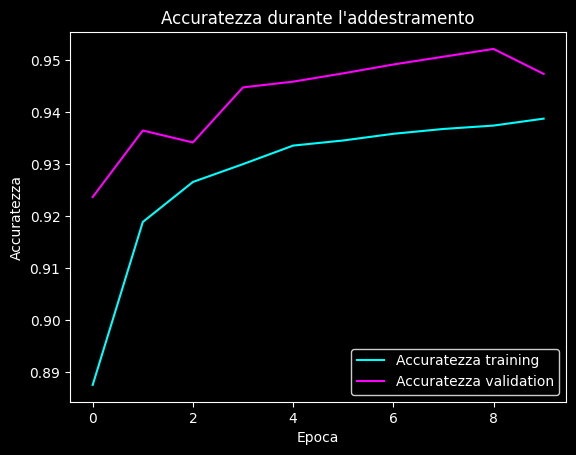

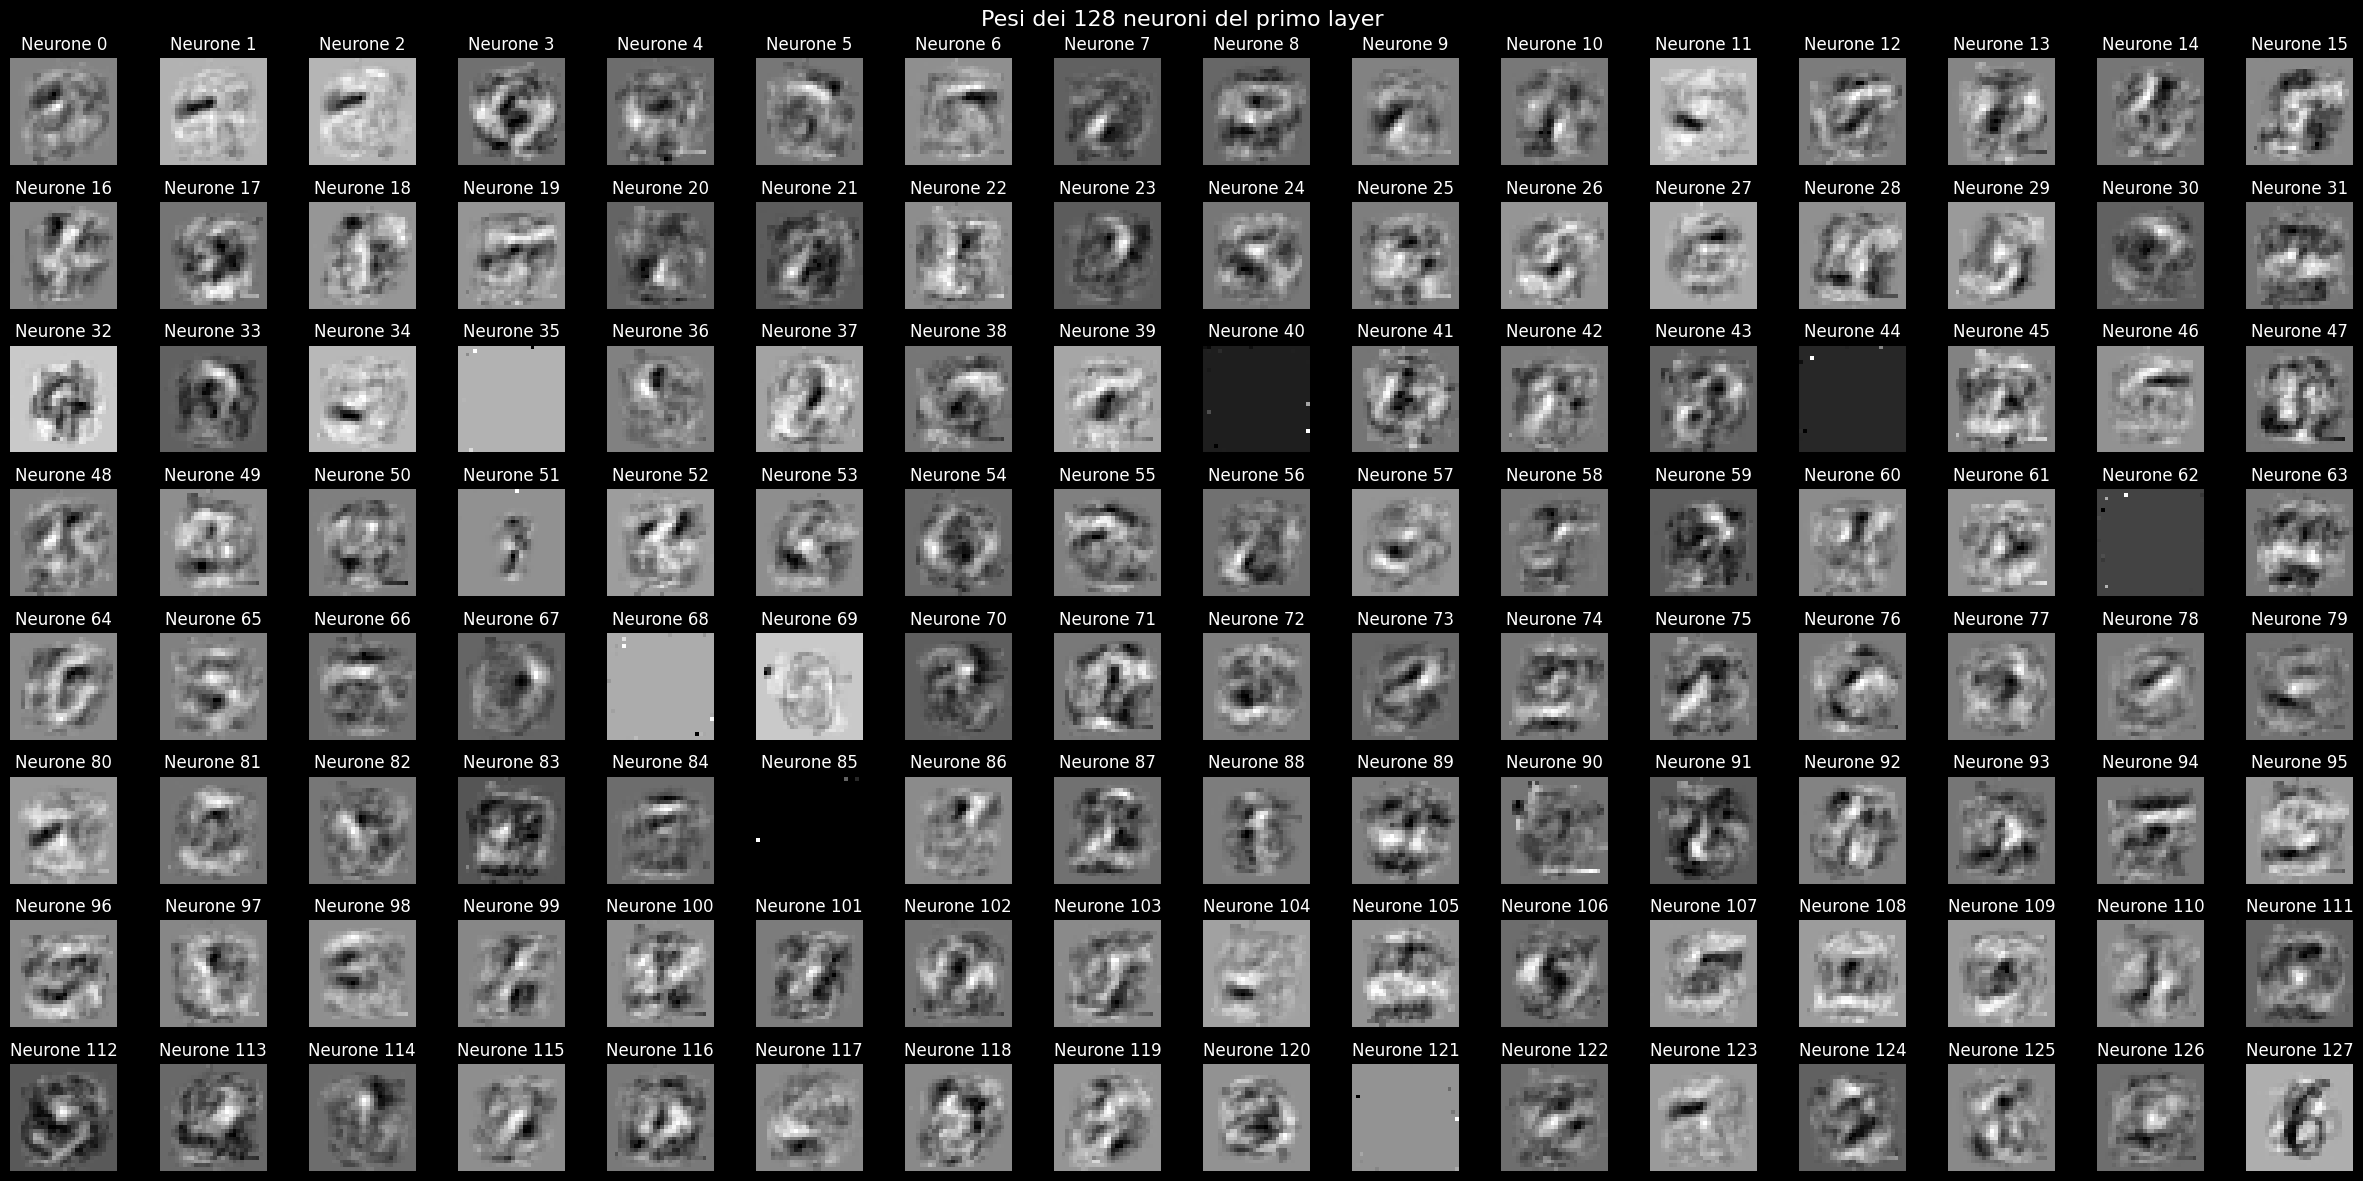

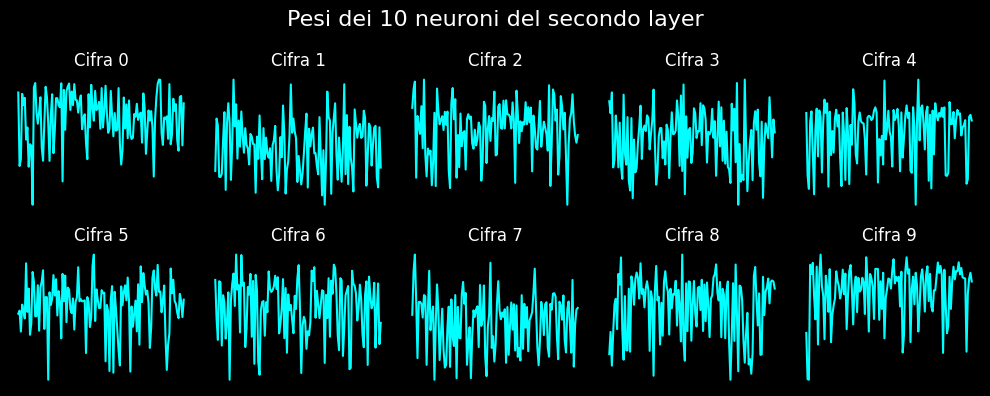

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Immagine 0: Predetta = 7, Reale = 7
Immagine 1: Predetta = 2, Reale = 2
Immagine 2: Predetta = 1, Reale = 1
Immagine 3: Predetta = 0, Reale = 0
Immagine 4: Predetta = 4, Reale = 4


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

# Carica il dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Visualizza un paio di immagini di training con le loro etichette
plt.figure(figsize=(8, 4))
for i in range(2):  # Visualizza le prime 2 immagini
    plt.subplot(1, 2, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Etichetta: {y_train[i]}")
    plt.axis('off')
plt.show()

# Normalizza le immagini
x_train = x_train / 255.0
x_test = x_test / 255.0

# Regolarizzazione: Per evitare overfitting
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compila il modello
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Addestra il modello e salva la storia
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Valuta il modello
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuratezza sul set di test: {accuracy:.4f}')

# Plotta l'accuratezza
plt.plot(history.history['accuracy'], label='Accuratezza training', color='cyan')
plt.plot(history.history['val_accuracy'], label='Accuratezza validation', color='magenta')
plt.title('Accuratezza durante l\'addestramento', color='white')
plt.xlabel('Epoca', color='white')
plt.ylabel('Accuratezza', color='white')
plt.legend(facecolor='black', edgecolor='white', labelcolor='white')
plt.tick_params(colors='white')
plt.show()

# Plotta i pesi del primo layer Dense
weights_layer1 = model.layers[1].get_weights()[0]  # Pesi del primo Dense layer (784, 128)
n_neurons_layer1 = weights_layer1.shape[1]  # 128 neuroni
n_cols_layer1 = 16  # Numero di colonne per il plot
n_rows_layer1 = (n_neurons_layer1 + n_cols_layer1 - 1) // n_cols_layer1  # Calcola righe necessarie

plt.figure(figsize=(n_cols_layer1 * 1.5, n_rows_layer1 * 1.5), facecolor='black')
for i in range(n_neurons_layer1):
    plt.subplot(n_rows_layer1, n_cols_layer1, i + 1)
    weight_image = weights_layer1[:, i].reshape(28, 28)  # Risagoma i pesi in 28x28
    plt.imshow(weight_image, cmap='gray')
    plt.title(f'Neurone {i}', color='white')
    plt.axis('off')

plt.suptitle('Pesi dei 128 neuroni del primo layer', color='white', fontsize=16)
plt.tight_layout()
plt.show()

# Plotta i pesi del secondo layer Dense
weights_layer2 = model.layers[3].get_weights()[0]  # Pesi del secondo Dense layer (128, 10)
n_neurons_layer2 = weights_layer2.shape[1]  # 10 neuroni (cifre 0-9)
n_cols_layer2 = 5  # Numero di colonne per il plot
n_rows_layer2 = (n_neurons_layer2 + n_cols_layer2 - 1) // n_cols_layer2  # Calcola righe necessarie

plt.figure(figsize=(n_cols_layer2 * 2, n_rows_layer2 * 2), facecolor='black')
for i in range(n_neurons_layer2):
    plt.subplot(n_rows_layer2, n_cols_layer2, i + 1)
    weight_vector = weights_layer2[:, i]  # Vettore di pesi (128,)
    plt.plot(weight_vector, color='cyan')
    plt.title(f'Cifra {i}', color='white')
    plt.axis('off')

plt.suptitle('Pesi dei 10 neuroni del secondo layer', color='white', fontsize=16)
plt.tight_layout()
plt.show()

# Fai previsioni sulle prime 5 immagini del test set
predictions = model.predict(x_test[:5])
for i in range(5):
    predicted_label = tf.argmax(predictions[i]).numpy()
    true_label = y_test[i]
    print(f"Immagine {i}: Predetta = {predicted_label}, Reale = {true_label}")


# Esercizio Capitolo 2 v0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8788 - loss: 0.4337 - val_accuracy: 0.9565 - val_loss: 0.1428
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9635 - loss: 0.1246 - val_accuracy: 0.9665 - val_loss: 0.0996
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9762 - loss: 0.0793 - val_accuracy: 0.9744 - val_loss: 0.0808
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9830 - loss: 0.0593 - val_accuracy: 0.9792 - val_loss: 0.0710
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9866 - loss: 0.0439 - val_accuracy: 0.9770 - val_loss: 0.0756
Accuratezza sul set di test: 0.9770


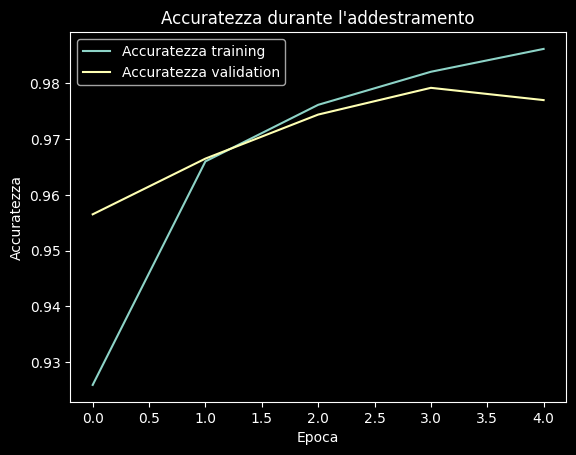

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Immagine 0: Predetta = 7, Reale = 7
Immagine 1: Predetta = 2, Reale = 2
Immagine 2: Predetta = 1, Reale = 1
Immagine 3: Predetta = 0, Reale = 0
Immagine 4: Predetta = 4, Reale = 4


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

# Carica il dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizza le immagini
x_train = x_train / 255.0
x_test = x_test / 255.0

# Definisci il modello
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compila il modello
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Addestra il modello e salva la storia
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Valuta il modello
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuratezza sul set di test: {accuracy:.4f}')

# Imposta lo stile con sfondo nero
plt.style.use('dark_background')

# Plotta l'accuratezza
plt.plot(history.history['accuracy'], label='Accuratezza training')
plt.plot(history.history['val_accuracy'], label='Accuratezza validation')
plt.title('Accuratezza durante l\'addestramento')
plt.xlabel('Epoca')
plt.ylabel('Accuratezza')
plt.legend()
plt.show()

# Fai previsioni sulle prime 5 immagini del test set
predictions = model.predict(x_test[:5])
for i in range(5):
    predicted_label = tf.argmax(predictions[i]).numpy()
    true_label = y_test[i]
    print(f"Immagine {i}: Predetta = {predicted_label}, Reale = {true_label}")

# Esercizio Capitolo 2 v3

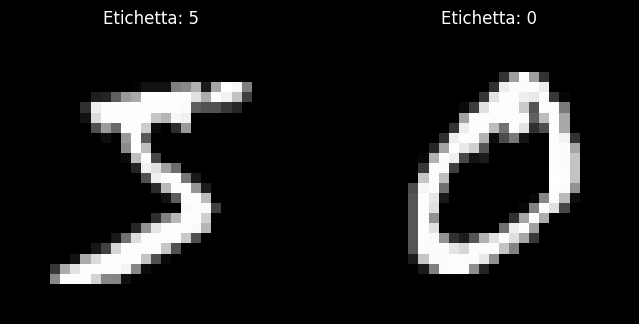

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8416 - loss: 1.0345 - val_accuracy: 0.9184 - val_loss: 0.4420
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9150 - loss: 0.4536 - val_accuracy: 0.9290 - val_loss: 0.4034
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9248 - loss: 0.4149 - val_accuracy: 0.9430 - val_loss: 0.3526
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9332 - loss: 0.3820 - val_accuracy: 0.9475 - val_loss: 0.3342
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9313 - loss: 0.3809 - val_accuracy: 0.9518 - val_loss: 0.3068
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9364 - loss: 0.3663 - val_accuracy: 0.9522 - val_loss: 0.3129
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9362 - loss: 0.3646 - val_accuracy: 0.9556 - val_loss: 0.3020
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9393 - loss: 0.3519 - 

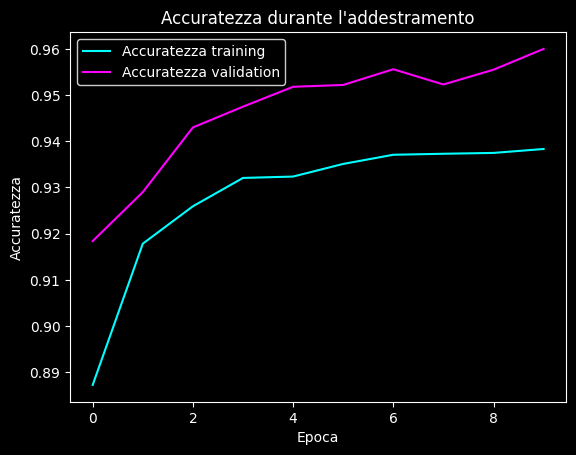

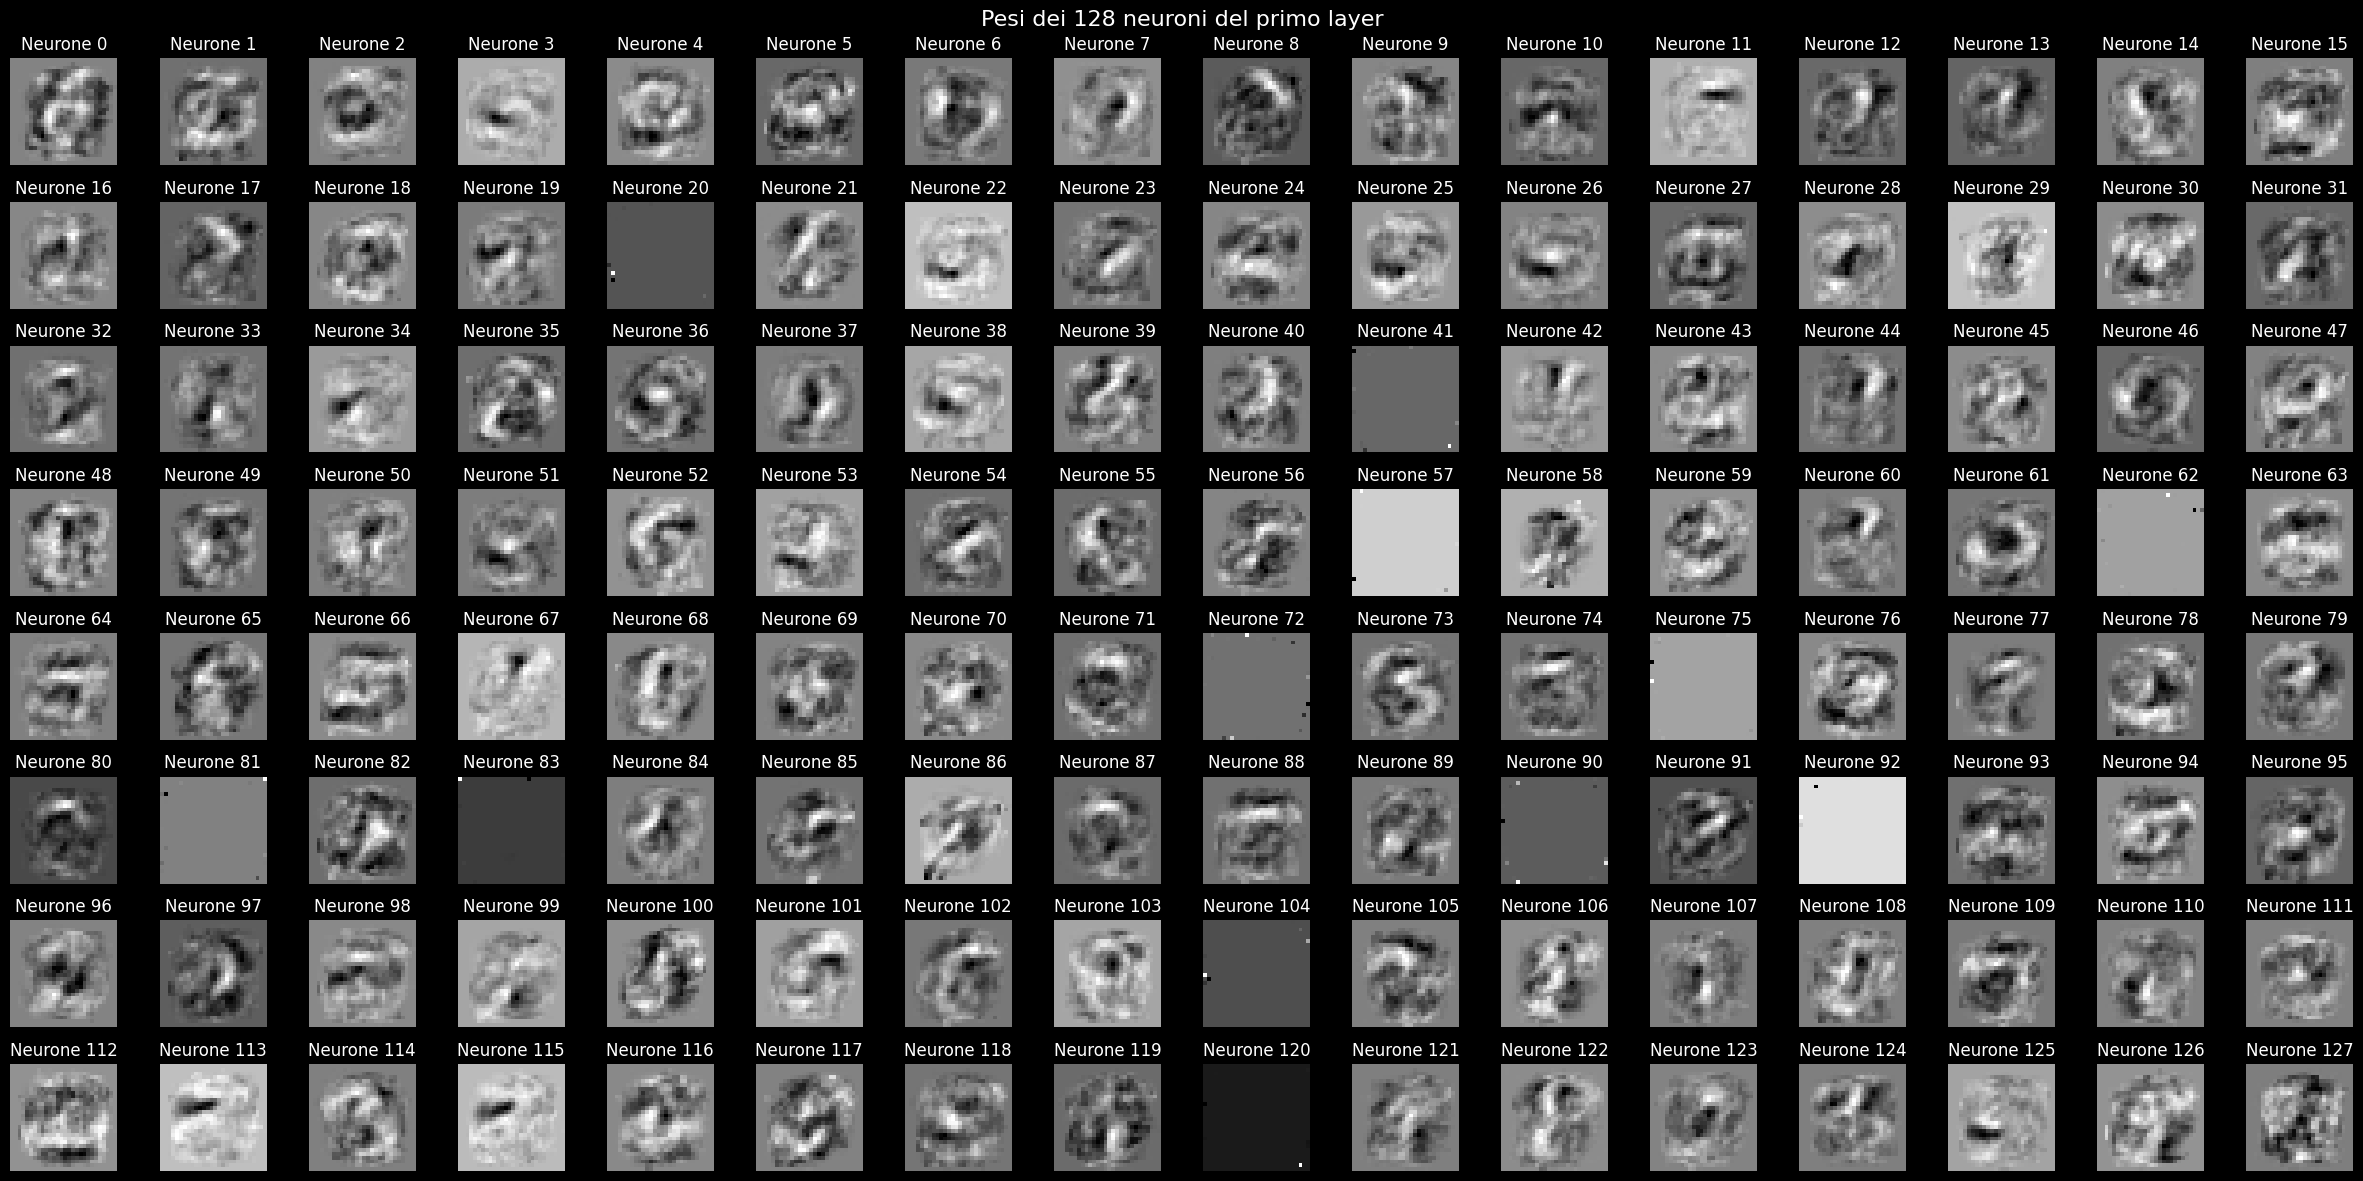

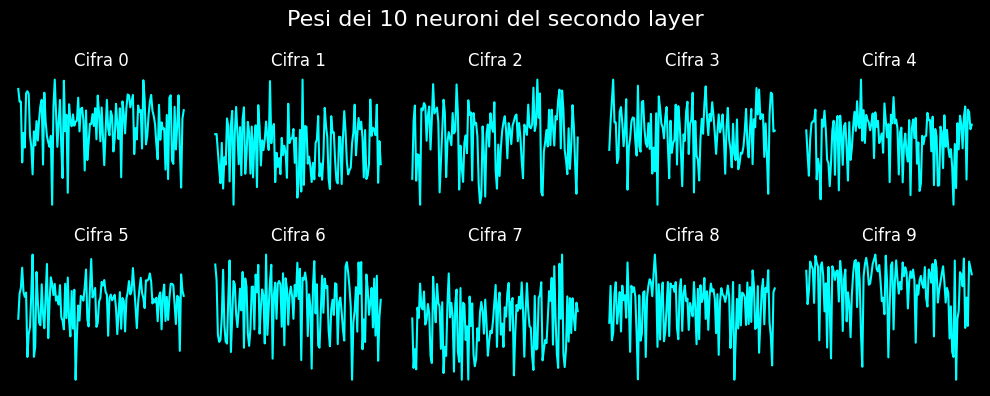

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Immagine 0: Predetta = 7, Reale = 7
Immagine 1: Predetta = 2, Reale = 2
Immagine 2: Predetta = 1, Reale = 1
Immagine 3: Predetta = 0, Reale = 0
Immagine 4: Predetta = 4, Reale = 4
Vuoi caricare un'immagine? (Sì/No o Exit): exit
Terminazione del programma.


In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from google.colab import files

# Carica il dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Visualizza un paio di immagini di training con le loro etichette
plt.figure(figsize=(8, 4))
for i in range(2):  # Visualizza le prime 2 immagini
    plt.subplot(1, 2, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Etichetta: {y_train[i]}")
    plt.axis('off')
plt.show()

# Normalizza le immagini
x_train = x_train / 255.0
x_test = x_test / 255.0

# Regolarizzazione: Per evitare overfitting
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compila il modello
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Addestra il modello e salva la storia (10 epoche)
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Valuta il modello
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuratezza sul set di test: {accuracy:.4f}')

# Plotta l'accuratezza
plt.plot(history.history['accuracy'], label='Accuratezza training', color='cyan')
plt.plot(history.history['val_accuracy'], label='Accuratezza validation', color='magenta')
plt.title('Accuratezza durante l\'addestramento', color='white')
plt.xlabel('Epoca', color='white')
plt.ylabel('Accuratezza', color='white')
plt.legend(facecolor='black', edgecolor='white', labelcolor='white')
plt.tick_params(colors='white')
plt.show()

# Plotta i pesi del primo layer Dense
weights_layer1 = model.layers[1].get_weights()[0]  # Pesi del primo Dense layer (784, 128)
n_neurons_layer1 = weights_layer1.shape[1]  # 128 neuroni
n_cols_layer1 = 16  # Numero di colonne per il plot
n_rows_layer1 = (n_neurons_layer1 + n_cols_layer1 - 1) // n_cols_layer1  # Calcola righe necessarie

plt.figure(figsize=(n_cols_layer1 * 1.5, n_rows_layer1 * 1.5), facecolor='black')
for i in range(n_neurons_layer1):
    plt.subplot(n_rows_layer1, n_cols_layer1, i + 1)
    weight_image = weights_layer1[:, i].reshape(28, 28)  # Risagoma i pesi in 28x28
    plt.imshow(weight_image, cmap='gray')
    plt.title(f'Neurone {i}', color='white')
    plt.axis('off')

plt.suptitle('Pesi dei 128 neuroni del primo layer', color='white', fontsize=16)
plt.tight_layout()
plt.show()

# Plotta i pesi del secondo layer Dense
weights_layer2 = model.layers[3].get_weights()[0]  # Pesi del secondo Dense layer (128, 10)
n_neurons_layer2 = weights_layer2.shape[1]  # 10 neuroni (cifre 0-9)
n_cols_layer2 = 5  # Numero di colonne per il plot
n_rows_layer2 = (n_neurons_layer2 + n_cols_layer2 - 1) // n_cols_layer2  # Calcola righe necessarie

plt.figure(figsize=(n_cols_layer2 * 2, n_rows_layer2 * 2), facecolor='black')
for i in range(n_neurons_layer2):
    plt.subplot(n_rows_layer2, n_cols_layer2, i + 1)
    weight_vector = weights_layer2[:, i]  # Vettore di pesi (128,)
    plt.plot(weight_vector, color='cyan')
    plt.title(f'Cifra {i}', color='white')
    plt.axis('off')

plt.suptitle('Pesi dei 10 neuroni del secondo layer', color='white', fontsize=16)
plt.tight_layout()
plt.show()

# Fai previsioni sulle prime 5 immagini del test set
predictions = model.predict(x_test[:5])
for i in range(5):
    predicted_label = tf.argmax(predictions[i]).numpy()
    true_label = y_test[i]
    print(f"Immagine {i}: Predetta = {predicted_label}, Reale = {true_label}")

# Funzione per caricare e predire un'immagine in loop
def predict_digit(binarize=False):  # Disattivata la binarizzazione per default
    while True:
        action = input("Vuoi caricare un'immagine? (Sì/No o Exit): ").lower().strip()
        if len(action) > 5:
            print("Errore: L'input supera i 5 caratteri.")
            continue
        if action in ['no', 'exit']:
            print("Terminazione del programma.")
            break

        if action in ['sì', 'si']:
            try:
                uploaded = files.upload()
                for filename in uploaded.keys():
                    img = Image.open(filename).convert('L')
                    # Verifica che l'immagine sia già 28x28
                    img_array = np.array(img) / 255.0
                    if img_array.shape != (28, 28):
                        raise ValueError("L'immagine deve essere già 28x28 pixel!")
                    # Binarizzazione opzionale
                    if binarize:
                        img_array = (img_array > 0.5).astype(np.float32)
                    plt.imshow(img_array, cmap='gray')
                    plt.title("Immagine originale", color='white')
                    plt.axis('off')
                    plt.show()

                    # Converti in tensore con forma definita
                    img_array = tf.convert_to_tensor(img_array, dtype=tf.float32)
                    img_array = tf.reshape(img_array, [1, 28, 28])

                    prediction = model.predict(img_array)
                    predicted_digit = tf.argmax(prediction[0]).numpy()
                    probabilities = prediction[0]

                    print("Probabilità per ogni cifra (0-9):")
                    for i, prob in enumerate(probabilities):
                        print(f"Cifra {i}: {prob:.4f}")

                    plt.imshow(img_array[0], cmap='gray')
                    plt.title(f"Predetto: {predicted_digit}", color='white')
                    plt.axis('off')
                    plt.show()
                    print(f"La cifra predetta è: {predicted_digit}")
            except Exception as e:
                print(f"Errore durante il caricamento: {e}")

# Esegui la funzione senza binarizzazione
predict_digit(binarize=False)